In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [6]:
X = pd.read_csv('references/training_set_values.csv', index_col = 'id')
y = pd.read_csv('references/training_set_labels.csv', index_col = 'id')['status_group']
df = X.copy()
df['target'] = y.copy()

In [7]:
df['target'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: target, dtype: int64

In [22]:
# df.drop[col = ['num_private'], inplace = True]

In [23]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# Basic FSM

A basic logistic regression model that does not have anything applied to it other than a max_iter to keep errors from popping up.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)


In [25]:
X_train_num = X_train.select_dtypes(exclude = ['object'])
lg = LogisticRegression(max_iter = 1000)
lg.fit(X_train_num, y_train)
cross_val_score(lg, X_train_num, y_train, cv = 5)

array([0.55566779, 0.55185185, 0.54848485, 0.54893378, 0.55252525])

The basic FSM has an r<sup>2</sup> score of around 0.55

In [9]:
X['construction_year'].replace({0: np.nan}, inplace = True)

In [10]:
X.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year        20709
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [11]:
# keep nans in construction year; create a new column that marks if it's nan or not
# decision tree

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)
X_train_num = X_train.select_dtypes(exclude = ['object'])
X_test_num = X_test.select_dtypes(exclude = ['object'])

In [53]:
si = SimpleImputer()
X_train_num_si = pd.DataFrame(si.fit_transform(X_train_num), index = X_train_num.index, columns = X_train_num.columns)
X_train_num_si['construction_year'].value_counts()

0.0       15463
2010.0     2001
2008.0     1959
2009.0     1892
2000.0     1595
2007.0     1195
2006.0     1103
2003.0      989
2011.0      943
2012.0      839
2004.0      823
2002.0      790
1978.0      787
1995.0      750
1998.0      745
1999.0      744
1990.0      741
2005.0      740
1985.0      685
1980.0      629
1996.0      613
1984.0      600
1982.0      571
1994.0      556
1972.0      515
1974.0      505
1997.0      484
1992.0      482
1993.0      463
2001.0      403
1988.0      398
1983.0      361
1975.0      326
1986.0      324
1970.0      293
1976.0      292
1991.0      236
1989.0      223
1987.0      219
1981.0      172
1977.0      156
1979.0      150
1973.0      142
2013.0      129
1971.0      112
1960.0       79
1963.0       72
1967.0       65
1968.0       57
1969.0       44
1964.0       28
1962.0       24
1961.0       15
1966.0       14
1965.0       14
Name: construction_year, dtype: int64

# Upsampling Scratchwork

In [14]:
# df_0 = df[df.target == 'functional']
# df_1 = df[df.target == 'functional needs repair']
# df_2 = df[df.target == 'non functional']

# df_1_upsample = resample(df_1, replace = True, n_samples = 32259, random_state = 42)
# df_2_upsample = resample(df_2, replace = True, n_samples = 32259, random_state = 42)
# df_up = pd.concat([df_0, df_1_upsample, df_2_upsample])

In [15]:
# df['target'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: target, dtype: int64

In [16]:
# df_up['target'].value_counts()

functional needs repair    32259
non functional             32259
functional                 32259
Name: target, dtype: int64

In [17]:
# X_train, X_test, y_train, y_test = train_test_split(df_up.drop(columns = ['target']), df_up['target'], random_state = 42, test_size = 0.25)
# X_train_num = X_train.select_dtypes(exclude = ['object'])
# lg = LogisticRegression(max_iter = 1000)
# lg.fit(X_train_num, y_train)
# cross_val_score(lg, X_train_num, y_train, cv = 5)

Y:\Users\awyeh\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KeyboardInterrupt: 

In [54]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_num, y_train)

In [55]:
X_train_num.shape

(44550, 9)

In [56]:
X_train.shape

(44550, 39)

In [57]:
X_train_resampled.shape

(72483, 9)

In [58]:
y_train.shape

(44550,)

In [59]:
y_train_resampled.shape

(72483,)

In [60]:
y_train.value_counts()

functional                 24161
non functional             17146
functional needs repair     3243
Name: status_group, dtype: int64

In [61]:
y_train_resampled.value_counts()

functional needs repair    24161
non functional             24161
functional                 24161
Name: status_group, dtype: int64

In [66]:
ss = StandardScaler()
X_train_resampeled_ss = ss.fit_transform(X_train_resampled)
X_test_ss = ss.fit_transform(X_test_num)

In [79]:
lg1 = LogisticRegression(max_iter = 1000)
lg1.fit(X_train_num, y_train)
confusion_matrix(y_test, lg1.predict(X_test_ss))

array([[3800, 2282, 2016],
       [ 404,  423,  247],
       [2478, 1956, 1244]], dtype=int64)

In [67]:
knn1 = KNeighborsClassifier(3)
knn1.fit(X_train_resampeled_ss, y_train_resampled)
confusion_matrix(y_test, knn1.predict(X_test_ss))

KNeighborsClassifier(n_neighbors=3)

In [76]:
knn2 = KNeighborsClassifier(5)
knn2.fit(X_train_resampeled_ss, y_train_resampled)
confusion_matrix(y_test, knn2.predict(X_test_ss))

array([[4588, 1192, 2318],
       [ 395,  390,  289],
       [1850,  644, 3184]], dtype=int64)

In [77]:
knn3 = KNeighborsClassifier(7)
knn3.fit(X_train_resampeled_ss, y_train_resampled)
confusion_matrix(y_test, knn3.predict(X_test_ss))

array([[4685, 1240, 2173],
       [ 383,  420,  271],
       [1873,  705, 3100]], dtype=int64)

In [83]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_resampeled_ss, y_train_resampled)
confusion_matrix(y_test, dt.predict(X_test_ss))

array([[2848, 1833, 3417],
       [ 318,  348,  408],
       [1816, 1040, 2822]], dtype=int64)

# Pipeline Scratchwork

In [87]:
pipe = Pipeline([('ss', StandardScaler()), ('tree', DecisionTreeClassifier(random_state = 42))])
pipe.fit(X_train_num, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('tree', DecisionTreeClassifier(random_state=42))])

In [89]:
pipe.score(X_test_num, y_test)

0.6676094276094277

In [97]:
grid = [{'tree__max_depth': [None, 2, 6, 10],
        'tree__min_samples_split': [5, 10]}]

gridsearch = GridSearchCV(estimator = pipe, param_grid = grid, scoring = 'accuracy', cv = 5)

gridsearch.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('tree',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid=[{'tree__max_depth': [None, 2, 6, 10],
                          'tree__min_samples_split': [5, 10]}],
             scoring='accuracy')

In [98]:
gridsearch.score(X_train_num, y_train)

0.9303030303030303

In [103]:
pca = PCA()
smt = SMOTE(random_state=42)
knn = KNeighborsClassifier()

In [110]:
pipeline = Pipeline([('smt', smt), ('pca', pca), ('knn', knn)])


In [112]:
pipeline.fit(X_train_num, y_train)

Pipeline(steps=[('smt', SMOTE(random_state=42)), ('pca', PCA()),
                ('knn', KNeighborsClassifier())])

In [113]:
y_hat = pipeline.predict(X_test_num)

In [114]:
print(classification_report(y_test, y_hat))

                         precision    recall  f1-score   support

             functional       0.72      0.60      0.66      8098
functional needs repair       0.20      0.53      0.29      1074
         non functional       0.62      0.57      0.59      5678

               accuracy                           0.58     14850
              macro avg       0.51      0.57      0.51     14850
           weighted avg       0.64      0.58      0.61     14850



# Data preprocessing

In [156]:
X.dropna(axis = 'columns', inplace = True)
X.drop(['date_recorded', 'ward', 'wpt_name'], axis = 1, inplace = True)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [158]:
X_train_num, X_test_num = X_train.select_dtypes(exclude = 'object'), X_test.select_dtypes(exclude = 'object')
X_train_cat, X_test_cat = X_train.select_dtypes(include = 'object'), X_test.select_dtypes(include = 'object')

In [159]:
si = SimpleImputer()
X_train_num_si = pd.DataFrame(si.fit_transform(X_train_num), index = X_train_num.index, columns = X_train_num.columns)
X_test_num_si = pd.DataFrame(si.transform(X_test_num), index = X_test_num.index, columns = X_test_num.columns)

In [160]:
ss = StandardScaler()
X_train_num_si_ss = pd.DataFrame(ss.fit_transform(X_train_num_si), index = X_train_num_si.index, columns = X_train_num_si.columns)
X_test_num_si_ss = pd.DataFrame(ss.transform(X_test_num_si), index = X_test_num_si.index, columns = X_test_num_si.columns)

In [161]:
ohe = OneHotEncoder(drop = 'if_binary', sparse = False)
X_train_num_si_ss_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat), index = X_train_cat.index, columns = ohe.get_feature_names(X_train_cat.columns))
X_test_num_si_ss_ohe = pd.DataFrame(ohe.transform(X_test_cat), index = X_test_cat.index, columns = ohe.get_feature_names(X_test_cat.columns))

In [164]:
X_train_num_si_ss_ohe_join = X_train_num_si_ss.join(X_train_num_si_ss_ohe)
X_test_num_si_ss_ohe_join = X_test_num_si_ss.join(X_test_num_si_ss_ohe)

In [163]:
y_train.value_counts()

functional                 24161
non functional             17146
functional needs repair     3243
Name: status_group, dtype: int64

In [179]:
y_test_f = y_test

In [165]:
sm = SMOTE(random_state = 42)
X_train_f, y_train_f = sm.fit_sample(X_train_num_si_ss_ohe_join, y_train)

In [168]:
y_train_f.value_counts()

functional needs repair    24161
non functional             24161
functional                 24161
Name: status_group, dtype: int64

In [167]:
lg2 = LogisticRegression(max_iter = 1000)
lg2.fit(X_train_f, y_train_f)
cross_val_score(lg2, X_train_f, y_train_f, cv = 5)

Y:\Users\awyeh\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0.67124233, 0.67731255, 0.67703663, 0.67418598, 0.67915287])

In [169]:
y_pred = lg2.predict(X_train_f)

In [177]:
lg2.score(X_train_f, y_train_f)

0.6797317991804975

In [180]:
lg2.score(X_test_f, y_test_f)

0.6414814814814814

In [171]:
print(classification_report(y_train_f, y_pred))

                         precision    recall  f1-score   support

             functional       0.65      0.64      0.65     24161
functional needs repair       0.65      0.74      0.69     24161
         non functional       0.76      0.66      0.70     24161

               accuracy                           0.68     72483
              macro avg       0.68      0.68      0.68     72483
           weighted avg       0.68      0.68      0.68     72483



In [174]:
g1 = {
    'max_iter': [ 100, 1000, 10000],
    'C': [ 0.1, 1.0, 10, 100],
    'tol': [ 10, 100, 1000],
}

gs1 = GridSearchCV(LogisticRegression(), g1)
gs1.fit(X_train_f, y_train_f)

Y:\Users\awyeh\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
Y:\Users\awyeh\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10, 100],
                         'max_iter': [100, 1000, 10000],
                         'tol': [10, 100, 1000]})

In [175]:
gs1.best_estimator_

LogisticRegression(C=10, max_iter=1000, tol=10)

In [181]:
gs1.best_score_

NameError: name 'gs1' is not defined

In [182]:
g2 = {
    'n_neighbors': [5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p' : [1,2]
}

gs2 = GridSearchCV(KNeighborsClassifier(), g2)
gs2.fit(X_train_f, y_train_f)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [183]:
gs2.best_estimator_

KNeighborsClassifier(p=1, weights='distance')

In [184]:
gs2.best_score_

0.8322645948594678

In [185]:
gs2.best_estimator_.score(X_test_f, y_test_f)

0.7494949494949495

In [365]:
g3 = {
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf' : [1,2,3]
}

gs3 = GridSearchCV(DecisionTreeClassifier(), g3)
gs3.fit(X_train_f, y_train_f)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [368]:
gs3.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_split=3)

In [369]:
gs3.best_score_

0.6541672338845779

In [370]:
gs3.best_estimator_.score(X_test_f, y_test_f)

0.6175757575757576

In [371]:
from sklearn.ensemble import RandomForestClassifier

g4 = {
    'max_depth': [ 2, 5, 10 ],
    'n_estimators': [ 100, 1000, 2000]
}

gs4 = GridSearchCV(RandomForestClassifier(), g4)
gs4.fit(X_train_f, y_train_f)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10],
                         'n_estimators': [100, 1000, 2000]})

In [372]:
gs4.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=2000)

In [373]:
gs4.best_score_

0.7201414464452643

In [374]:
gs4.best_estimator_.score(X_test_f, y_test_f)

0.6769023569023569

In [376]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
g5 = {
    'n_estimators': [ 10, 100, 1000],
    'max_depth': [None, 10, 100],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3]
}

gs5 = GridSearchCV(ExtraTreesClassifier(), g5)
gs5.fit(X_train_f, y_train_f)

# Visualizations

In [8]:
sns.set(context = 'notebook', style = 'whitegrid')

In [9]:
dv = df.copy()

In [10]:
dv.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group', 'target'],
      dtype='object')

(1960.0, 2015.0)

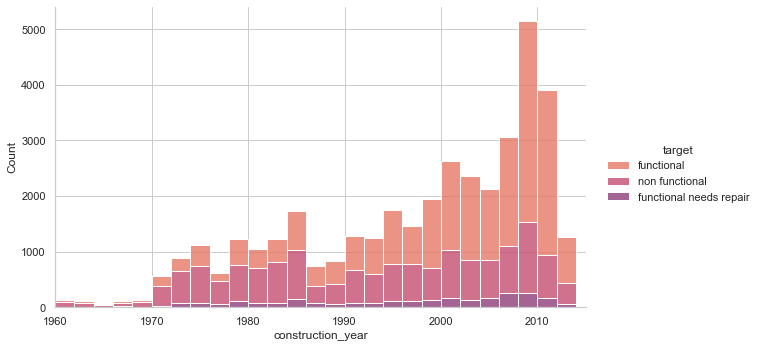

In [11]:
count = dv[dv.construction_year != 0]
sns.displot(data = count, x = 'construction_year', kind = 'hist', stat = 'count', hue = 'target', multiple = 'stack', binwidth = 2, element = 'bars', kde = False, palette = 'flare', aspect = 1.7)

plt.xlim(1960, 2015)

In [12]:
dv['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [13]:
dv[df['target'] == 'functional needs repair']['extraction_type_class'].value_counts()

gravity         2701
handpump         995
submersible      253
other            206
motorpump        138
rope pump         17
wind-powered       7
Name: extraction_type_class, dtype: int64

In [14]:
count_rfun = dv[df['target'] == 'functional needs repair']['extraction_type_class']
count_nfun = pd.concat([dv[df['target'] == 'non functional']['extraction_type_class'], count_rfun])
count_fun = pd.concat([dv[df['target'] == 'functional']['extraction_type_class'], count_nfun])

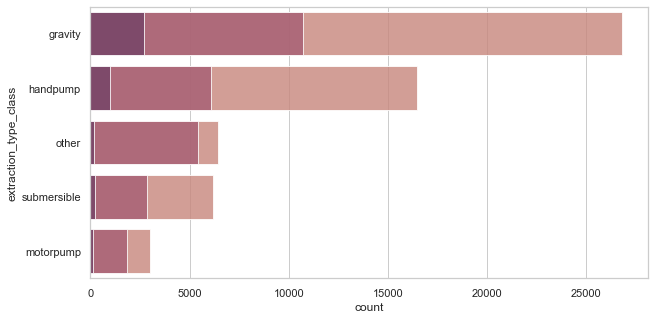

In [15]:
plt.figure(figsize = (10,5))
order = ['gravity', 'handpump', 'other', 'submersible', 'motorpump']
sns.countplot(y = count_fun, orient = 'v', color = '#d47d6f', order = order, alpha = 0.8)
sns.countplot(y = count_nfun, orient = 'v', color = '#b1516e', order = order, alpha = 0.8)
sns.countplot(y = count_rfun, orient = 'v', color = '#7b3b6b', order = order, alpha = 0.8)


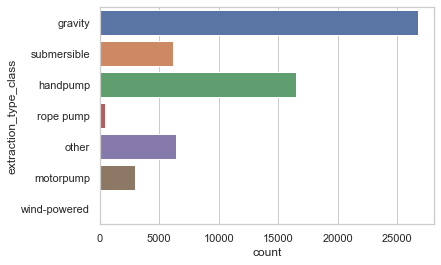

In [17]:
sns.countplot(y = count_fun, orient = 'v')

In [18]:
len(dv['population'].value_counts())

1049

In [19]:
dv['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [20]:
pop = df[dv['population'] > 0]

Y:\Users\awyeh\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


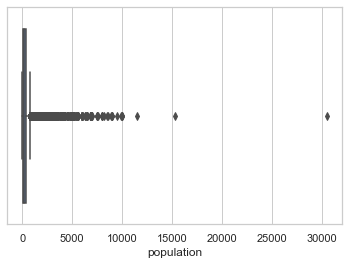

In [21]:
sns.boxplot(pop['population'])

In [22]:
pop.population

id
69572    109
8776     280
34310    250
67743     58
9944       1
        ... 
44885    210
11164     89
60739    125
27263     56
26348    150
Name: population, Length: 38019, dtype: int64

In [23]:
dv['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [24]:
dv['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [25]:
dv['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [26]:
dv['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [27]:
dv['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [28]:
cats = dv[dv['source_class'] != 'unknown']

In [29]:
cats['source_class'].value_counts()

groundwater    45794
surface        13328
Name: source_class, dtype: int64

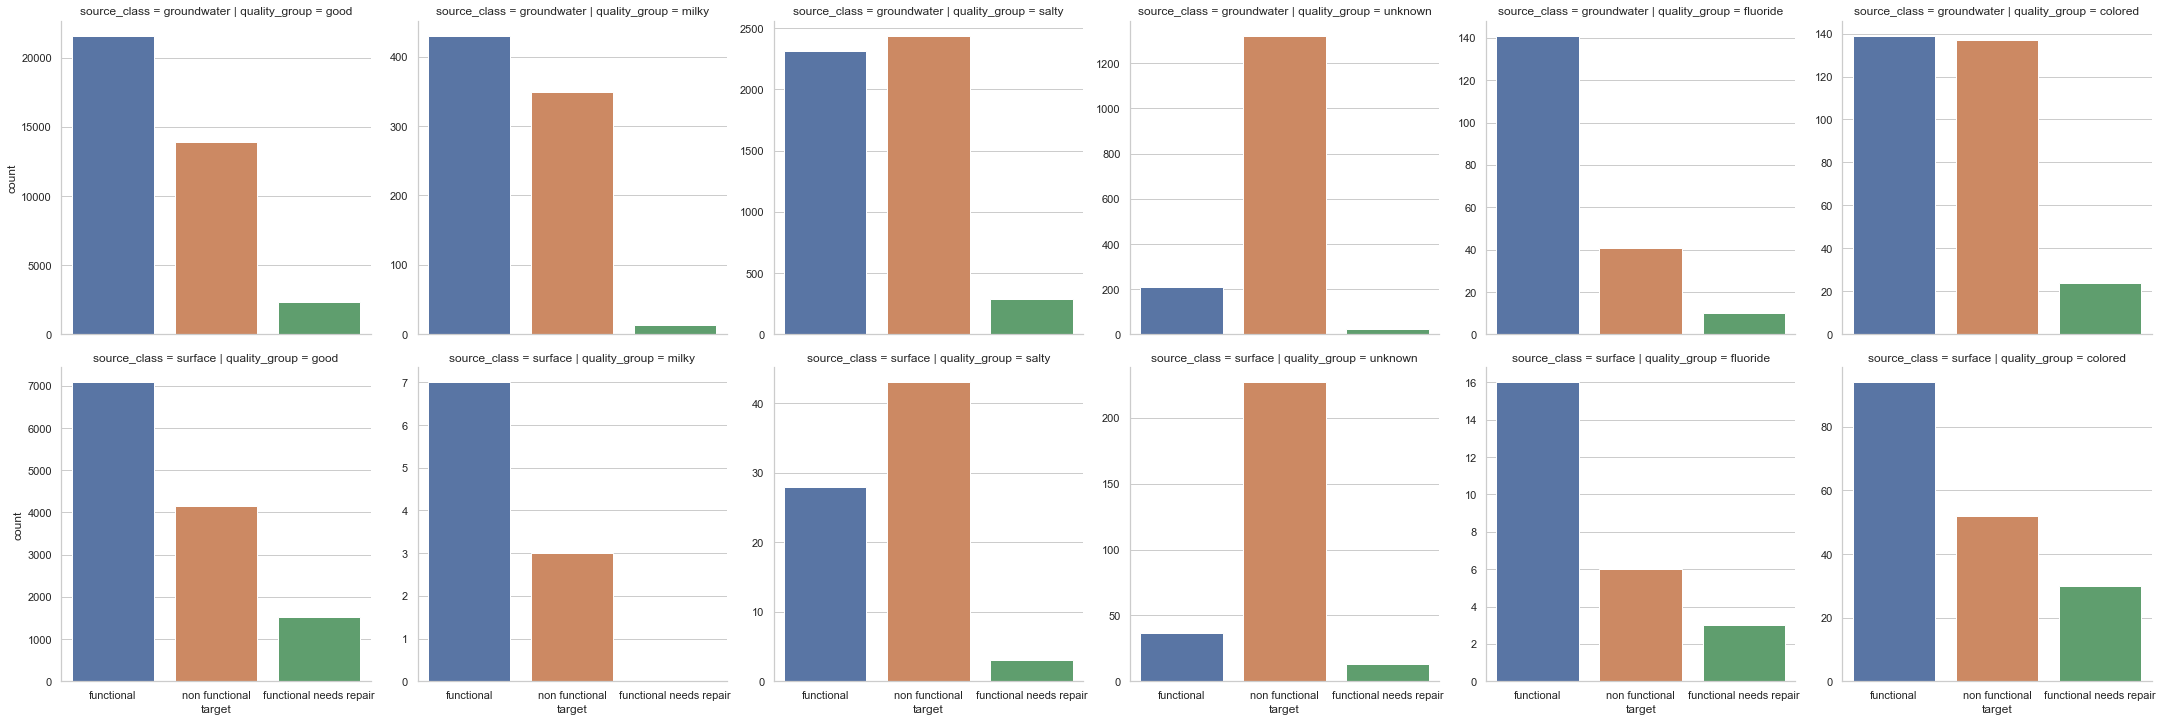

In [32]:
sns.catplot(data = cats, x = 'target', kind = 'count', row = 'source_class', col = 'quality_group', sharey = False)

In [112]:
percents = []
for i in cats['source_class'].unique():
    for j in cats['quality_group'].unique():
        tmp = cats[(cats['source_class'] == i) & (cats['quality_group'] == j)]
        percent_sum = tmp.target.value_counts().sort_index().values.sum()
        percent_name = tmp.target.value_counts().sort_index()
        percent = tmp.target.value_counts().sort_index().values/ percent_sum
        if (len(percent) < 3):
            percent = np.concatenate((percent, [0]))
        percents.append([i,j, 'functional', percent[0]])
        percents.append([i,j, 'non functional', percent[1]])
        percents.append([i,j, 'functional needs repair', percent[2]]        )

In [113]:
pf = pd.DataFrame(percents, columns = ['source_class', 'quality_group', 'target', 'percentage'])
pf.head()

,source_class,quality_group,target,percentage
0,groundwater,good,functional,0.569751
1,groundwater,good,non functional,0.062734
2,groundwater,good,functional needs repair,0.367514
3,groundwater,milky,functional,0.542245
4,groundwater,milky,non functional,0.017654


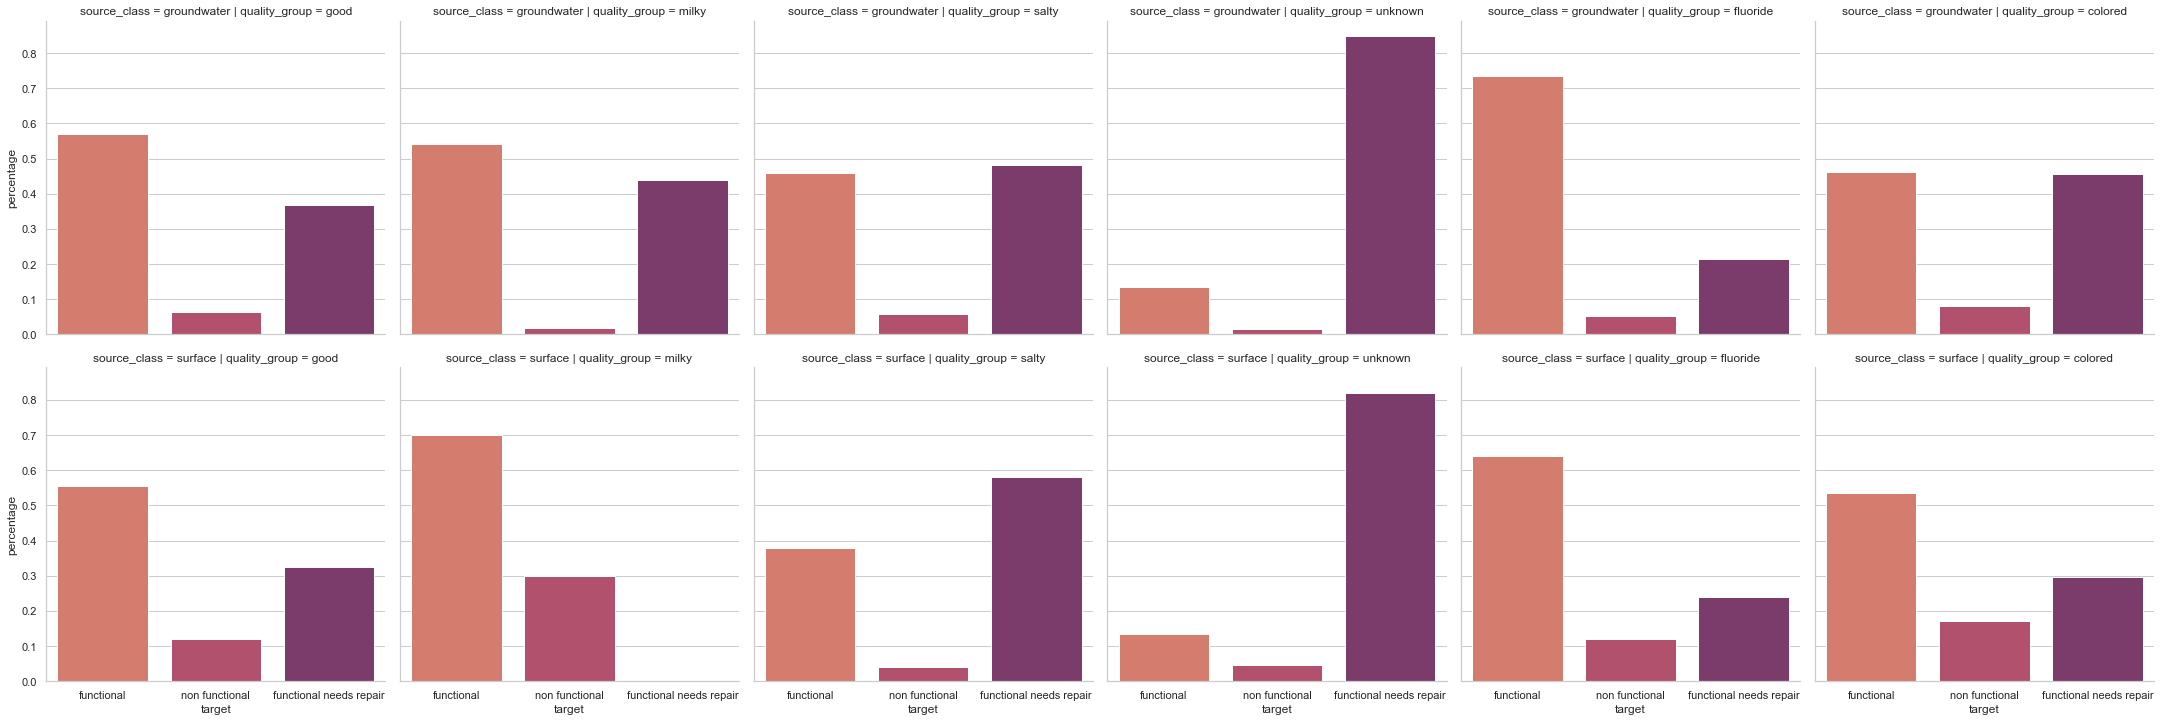

In [115]:
sns.catplot(data = pf, x = 'target', y = 'percentage', kind = 'bar', row = 'source_class', col = 'quality_group', palette = 'flare')

In [101]:
pf['quality_group'].value_counts().index()

Index(['salty', 'colored', 'fluoride', 'good', 'unknown', 'milky'], dtype='object')

In [102]:
pf['quality_group'].value_counts()

salty       6
colored     6
fluoride    6
good        6
unknown     6
milky       6
Name: quality_group, dtype: int64

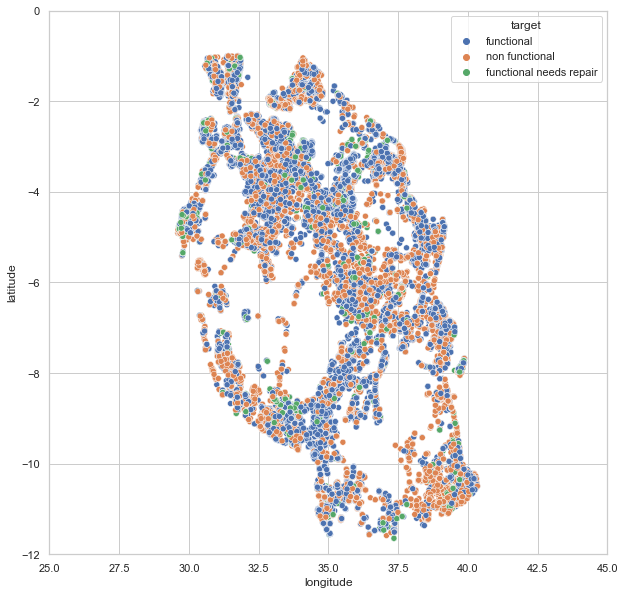

In [120]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'target', data = dv)
plt.xlim(25, 45)
plt.ylim(-12, 0)
plt.show()

In [123]:
dv['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [130]:
dv['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

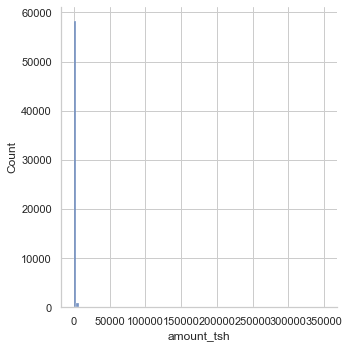

In [128]:
sns.displot(data = dv, x = 'amount_tsh', kind = 'hist', bins = 100)

ValueError: Contour levels must be increasing

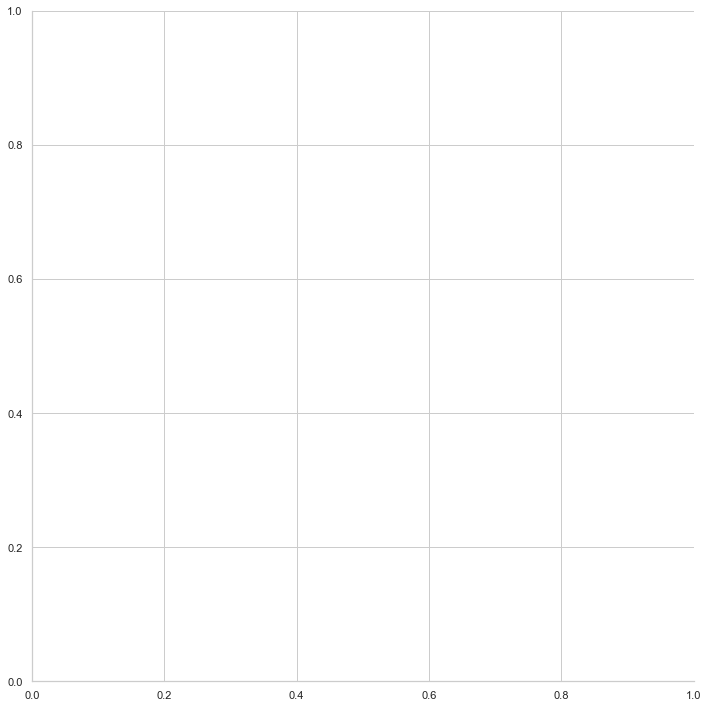

In [144]:
sns.displot(data = df, y = 'amount_tsh', x = 'population', kind = 'kde', height = 10, aspect = 1, color = '#663777', palette = 'flare')

ValueError: Contour levels must be increasing

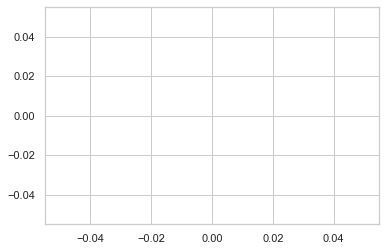

In [142]:
sns.kdeplot(data = dv, x = 'amount_tsh', y = 'population', hue = 'target', size = 'target', palette = 'flare')
plt.xlim(-1000,50000)
plt.ylim(-1000, 10000)

MemoryError: Unable to allocate 7.05 GiB for an array with shape (341408, 2770) and data type float64

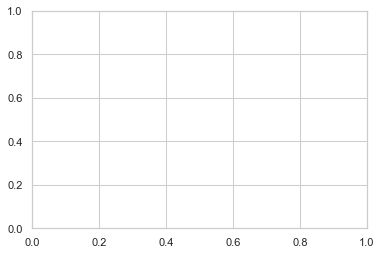

In [143]:
sns.histplot(data = dv, x = 'amount_tsh', y = 'population', hue = 'target', size = 'target', palette = 'flare')
plt.xlim(-1000,50000)
plt.ylim(-1000, 10000)

(-1000.0, 10000.0)

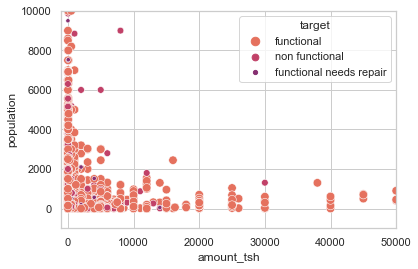

In [141]:
sns.scatterplot(data = dv, x = 'amount_tsh', y = 'population', hue = 'target', size = 'target', palette = 'flare')
plt.xlim(-1000,50000)
plt.ylim(-1000, 10000)

(1.0, 10000.0)

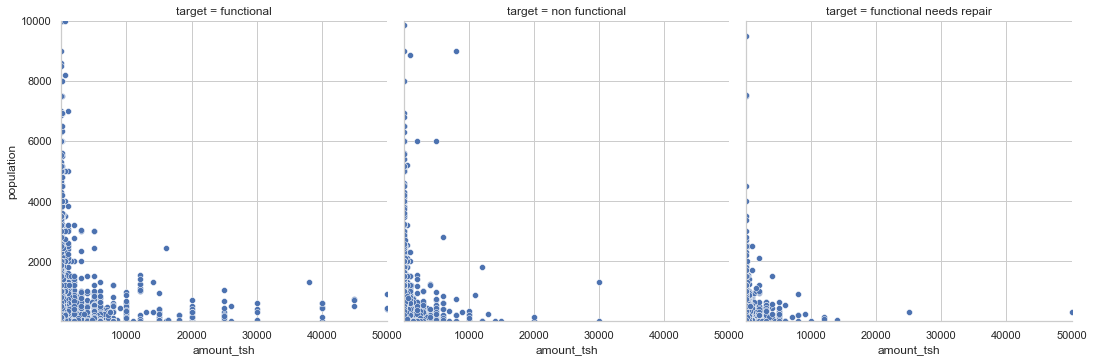

In [134]:
sns.relplot(data = dv, x = 'amount_tsh', y = 'population', col = 'target')
plt.xlim(1,50000)
plt.ylim(1, 10000)

(1.0, 10000.0)

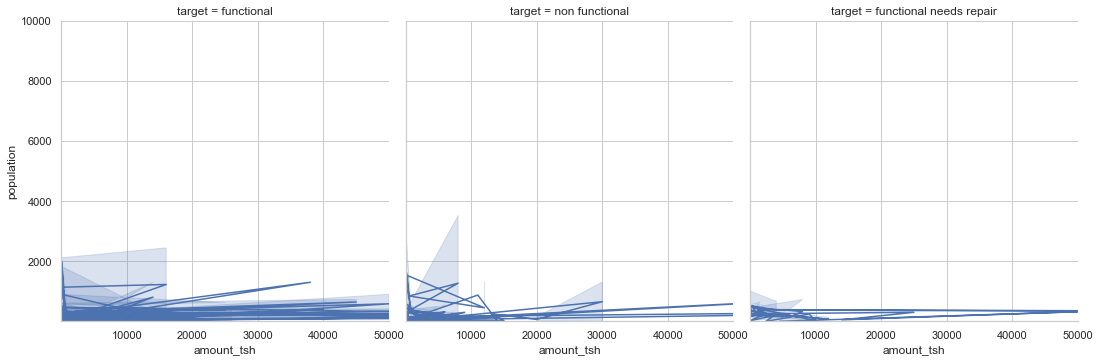

In [146]:
sns.relplot(data = dv, x = 'amount_tsh', y = 'population', col = 'target', kind = 'line', sort = False)
plt.xlim(1,50000)
plt.ylim(1, 10000)